In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Nexus/train.csv', encoding='latin1')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Explore unique values in the 'sentiment' column
print("\nUnique Sentiment Labels:")
print(df['sentiment'].unique())

# Explore the distribution of sentiment labels
print("\nSentiment Label Distribution:")
print(df['sentiment'].value_counts())

# Size of the dataset
print("\nDataset Size:")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None

First Few Rows:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138            

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Check for missing values in the 'text' column
df['text'].fillna('', inplace=True)




# Text Preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower() if isinstance(text, str) else text

    # Removing special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]

    return ' '.join(lemmatized_text)

# Apply the preprocessing function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Display the processed text
print(df[['text', 'processed_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                           processed_text  
0                      id responded going  
1                 sooo sad miss san diego  
2                            bos bullying  
3                   interview leave alone  
4  son couldnt put release already bought  


In [ ]:
print(df['selected_text'].isna().sum())

1


In [ ]:
# Remove rows with NaN values
df = df.dropna(subset=['selected_text'])

# Impute NaN values with a placeholder text
df['selected_text'].fillna('placeholder_text', inplace=True)
df['selected_text'] = df['selected_text'].astype(str)

<ipython-input-6-d44a37f786eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selected_text'].fillna('placeholder_text', inplace=True)
<ipython-input-6-d44a37f786eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selected_text'] = df['selected_text'].astype(str)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

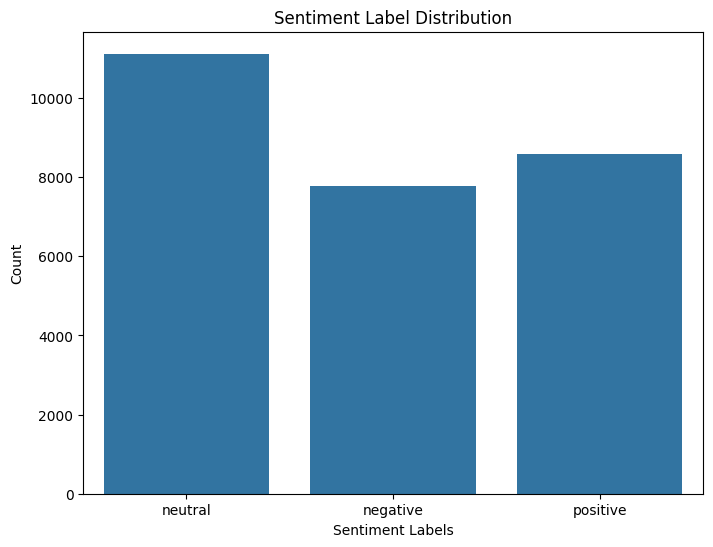

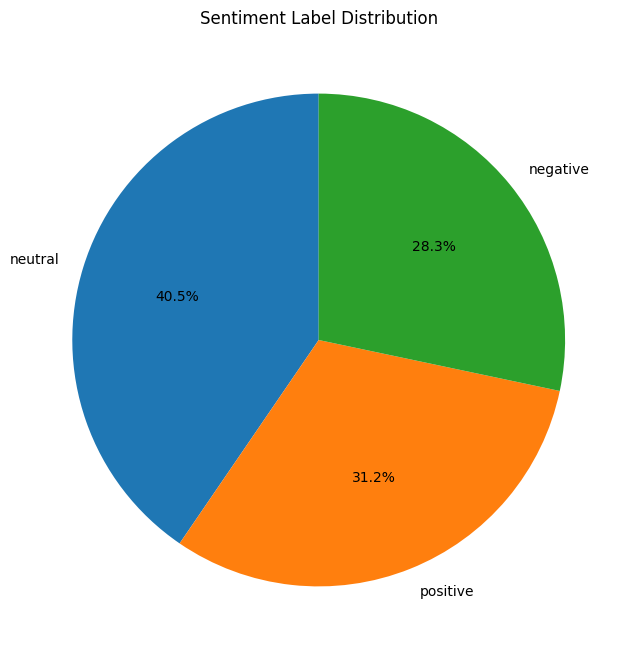

In [ ]:
# Display a histogram for sentiment label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

# Display a pie chart for sentiment label distribution
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Label Distribution')
plt.ylabel('')
plt.show()

In [ ]:
from gensim.models import Word2Vec

In [ ]:
df['processed_text'].fillna('', inplace=True)

# Tokenization and remove stop words
stop_words = set(stopwords.words('english'))
df['tokenized_text'] = df['processed_text'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words and word not in string.punctuation])

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get the vector representation of a document
def get_vector(text):
    vector = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    return sum(vector) / len(vector) if vector else [0] * 100  # Return zero vector if no words in the model

# Apply the vectorization function to the 'tokenized_text' column
df['vectorized_text'] = df['tokenized_text'].apply(get_vector)

# Display the resulting DataFrame
print(df[['processed_text', 'vectorized_text']].head())

                           processed_text  \
0                      id responded going   
1                 sooo sad miss san diego   
2                            bos bullying   
3                   interview leave alone   
4  son couldnt put release already bought   

                                     vectorized_text  
0  [-0.27589855, 0.60107464, -0.016186574, 0.1068...  
1  [-0.24601439, 0.54588425, -0.001336153, 0.1229...  
2  [-0.032948148, 0.06374255, 0.0041510696, 0.016...  
3  [-0.17984472, 0.4633496, -0.024835482, 0.09771...  
4  [-0.22664028, 0.5552239, -0.0154908225, 0.1304...  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF for SVM
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# SVM model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate SVM performance
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions, average='weighted'))
print("Recall:", recall_score(y_test, svm_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, svm_predictions, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))


SVM Metrics:
Accuracy: 0.6901382823871907
Precision: 0.7077758844609202
Recall: 0.6901382823871907
F1 Score: 0.6880613687115346

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.53      0.62      1572
     neutral       0.62      0.80      0.69      2236
    positive       0.79      0.69      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.72      0.67      0.69      5496
weighted avg       0.71      0.69      0.69      5496



In [ ]:
df['processed_text'].fillna('', inplace=True)
df['sentiment'].fillna('', inplace=True)

# Tokenization and remove stop words
stop_words = set(stopwords.words('english'))
df['tokenized_text'] = df['processed_text'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words and word not in string.punctuation])

# Convert the tokenized text back to string for LSTM
df['tokenized_text_str'] = df['tokenized_text'].apply(lambda x: ' '.join(x))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tokenized_text_str'], df['sentiment'], test_size=0.2, random_state=42)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenize text
max_words = 5000  # You can customize the number of words to use
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in X_train_sequences)  # Define max_length here
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=15, batch_size=32, validation_split=0.1)

# Evaluate the model
predictions = model.predict(X_test_padded)
rounded_predictions = [round(pred[0]) for pred in predictions]

# Convert rounded predictions back to original labels
y_pred = label_encoder.inverse_transform(rounded_predictions)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Epoch 1/15
619/619 [==============================] - 22s 31ms/step - loss: -4.1958 - accuracy: 0.4059 - val_loss: -9.5160 - val_accuracy: 0.4152
Epoch 2/15
619/619 [==============================] - 21s 34ms/step - loss: -13.1516 - accuracy: 0.4028 - val_loss: -15.3977 - val_accuracy: 0.4152
Epoch 3/15
619/619 [==============================] - 21s 34ms/step - loss: -23.3860 - accuracy: 0.4027 - val_loss: -27.5259 - val_accuracy: 0.4152
Epoch 4/15
619/619 [==============================] - 21s 34ms/step - loss: -34.1567 - accuracy: 0.4035 - val_loss: -31.6820 - val_accuracy: 0.4288
Epoch 5/15
619/619 [==============================] - 20s 32ms/step - loss: -44.7187 - accuracy: 0.4229 - val_loss: -45.2670 - val_accuracy: 0.4152
Epoch 6/15
619/619 [==============================] - 21s 34ms/step - loss: -60.0069 - accuracy: 0.4638 - val_loss: -54.3307 - val_accuracy: 0.4416
Epoch 7/15
619/619 [==============================] - 20s 32ms/step - loss: -27.1177 - accuracy: 0.4254 - val_loss

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Identify key variables
text_content = df['selected_text']
sentiment_labels = df['sentiment']


# Split the dataset into features (X) and labels (y)
X = df['selected_text']
y = df['sentiment']

# Convert labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Vectorize the text data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# SVM model
svm_model = SVC(C=1, kernel='linear')

# Define evaluation metric(s) for cross-validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_weighted': make_scorer(precision_score, average='weighted'),
           'recall_weighted': make_scorer(recall_score, average='weighted'),
           'f1_weighted': make_scorer(f1_score, average='weighted')}

# Perform cross-validation with stratified sampling using cross_validate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_validate to get more detailed results
svm_cv_results = cross_validate(svm_model, X_tfidf, y_encoded, cv=cv, scoring=scoring)

# Display cross-validation results
print("Cross-Validation Results:")
print("Mean Accuracy:", svm_cv_results['test_accuracy'].mean())
print("Mean Precision (weighted):", svm_cv_results['test_precision_weighted'].mean())
print("Mean Recall (weighted):", svm_cv_results['test_recall_weighted'].mean())
print("Mean F1 Score (weighted):", svm_cv_results['test_f1_weighted'].mean())


Cross-Validation Results:
Mean Accuracy: 0.832387190684134
Mean Precision (weighted): 0.8362212133009844
Mean Recall (weighted): 0.832387190684134
Mean F1 Score (weighted): 0.8327888560049969


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np


# Identify key variables
text_content = df['selected_text']
sentiment_labels = df['sentiment']

# Split the dataset into features (X) and labels (y)
X = df['selected_text']
y = df['sentiment']

# Convert labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize text
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in X_sequences)  # Define max_length here
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post')

# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_length))
    model.add(LSTM(100))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Convert labels to categorical for LSTM
y_categorical = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)


# Perform cross-validation
fold_accuracies = []

for train_index, test_index in cv.split(X_padded, y_encoded):
    X_train_fold, X_test_fold = X_padded[train_index], X_padded[test_index]
    y_train_fold, y_test_fold = y_categorical[train_index], y_categorical[test_index]

    model = create_lstm_model()
    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_test_fold, y_test_fold))

    # Evaluate the model on the test fold
    fold_probabilities = model.predict(X_test_fold)
    fold_predictions = np.argmax(fold_probabilities, axis=1)
    fold_accuracy = accuracy_score(np.argmax(y_test_fold, axis=1), fold_predictions)
    fold_accuracies.append(fold_accuracy)

print("Cross-Validation Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))

Epoch 1/5
687/687 [==============================] - 49s 67ms/step - loss: 0.6450 - accuracy: 0.7291 - val_loss: 0.5408 - val_accuracy: 0.7817
Epoch 2/5
687/687 [==============================] - 40s 58ms/step - loss: 0.4261 - accuracy: 0.8482 - val_loss: 0.4681 - val_accuracy: 0.8308
Epoch 3/5
687/687 [==============================] - 55s 81ms/step - loss: 0.3604 - accuracy: 0.8712 - val_loss: 0.4739 - val_accuracy: 0.8264
Epoch 4/5
687/687 [==============================] - 29s 42ms/step - loss: 0.3174 - accuracy: 0.8877 - val_loss: 0.5109 - val_accuracy: 0.8217
Epoch 5/5
172/172 [==============================] - 3s 13ms/step
Epoch 1/5
687/687 [==============================] - 33s 44ms/step - loss: 0.6612 - accuracy: 0.7259 - val_loss: 0.5535 - val_accuracy: 0.7780
Epoch 2/5
687/687 [==============================] - 33s 48ms/step - loss: 0.4219 - accuracy: 0.8451 - val_loss: 0.4589 - val_accuracy: 0.8231
Epoch 3/5
687/687 [==============================] - 29s 42ms/step - loss: 0